In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [39]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [40]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


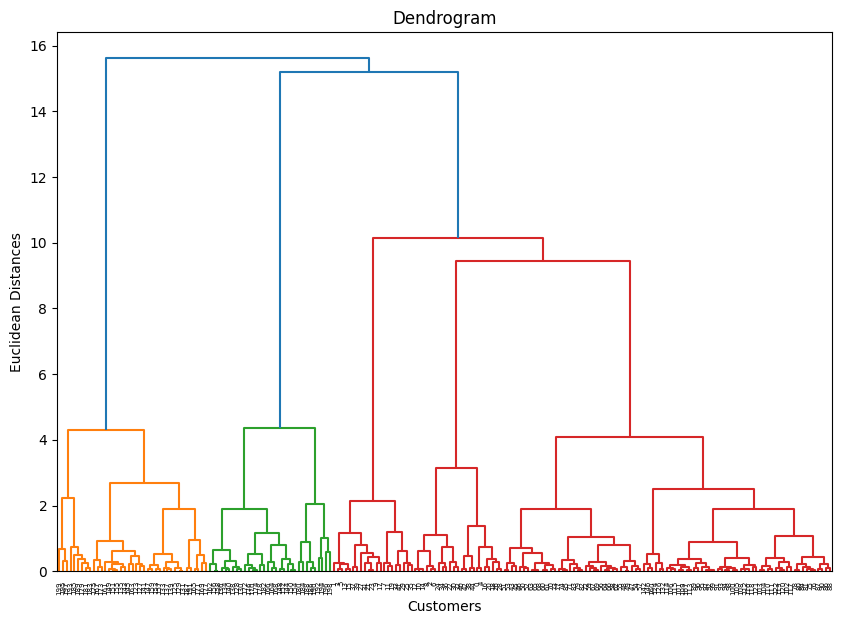

In [42]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


In [45]:
optimal_clusters = 5
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
data['Cluster'] = hc.fit_predict(X_scaled)


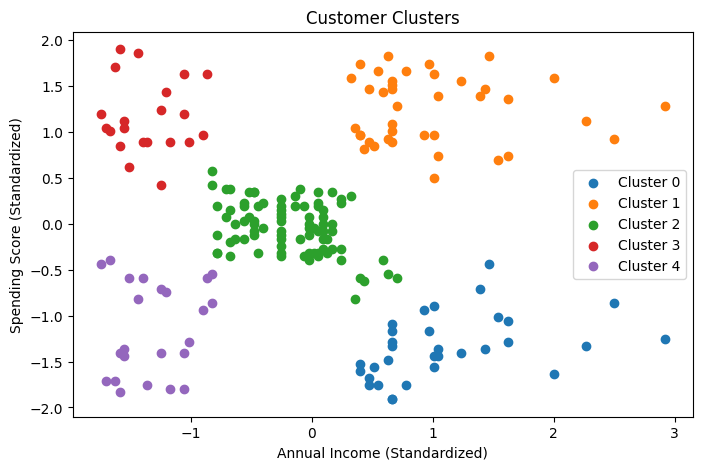

In [47]:
plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    plt.scatter(X_scaled[data['Cluster'] == cluster, 0], X_scaled[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
    
plt.title('Customer Clusters')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.show()